In [20]:
# Author By Gary1111

import numpy as np
import pandas as pd
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import matplotlib.pyplot as plt

train = pd.read_csv("../data/DataPre/train_XY.csv", index_col=False)
test = pd.read_csv('../data/DataPre/test.csv', index_col=False)
test.rename(columns={"Unnamed: 0": 'id'}, inplace=True)
test['id'] = list(range(1, 10001))
train_x = train.drop(['id', 'label'], axis=1)  # 得到训练特征
train_y = train['label']  # 得到训练标签
test_x = test.drop('id', axis=1)

test_x = test_x / 255
train_x = train_x / 255
train_y = train_y.to_numpy()
train_feature = train_x.to_numpy().reshape((-1, 28, 28,1))
test_feature = test_x.to_numpy().reshape((-1, 28, 28,1))
print(train_feature.shape, test_feature.shape)




(60000, 28, 28, 1) (10000, 28, 28, 1)


Text(0.5, 1.0, '1')

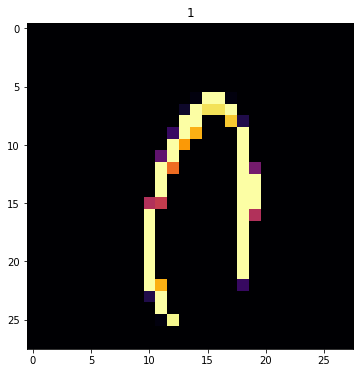

In [18]:
plt.figure(figsize=(6,6))
plt.imshow(train_feature[1],cmap='inferno')
plt.title(train_y[1])

In [16]:

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Conv2D(16, (3, 3), input_shape=(28, 28), activation='relu'))

classifier.add(Conv2D(32, kernel_size=3, padding="same", activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.25))

classifier.add(Conv2D(64, kernel_size=3, padding="same", activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.25))

classifier.add(Conv2D(128, kernel_size=3, padding="same", activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.25))

classifier.add(Conv2D(256, kernel_size=3, padding="same", activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.25))

classifier.add(Flatten())
classifier.add(Dense(256, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(10, activation='softmax'))

classifier.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 26, 26, 32)        4640      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 6, 6, 64)          0         
__________

In [38]:
#Plot the training loss & accuracy
from keras.callbacks import ModelCheckpoint,Callback,EarlyStopping
from keras.utils import to_categorical,plot_model

# Compiling the ANN
classifier.compile(loss='sparse_categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(train_feature, train_y, batch_size=128, epochs=10)



Epoch 1/10
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0358 - acc: 0.9901
Epoch 2/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0310 - acc: 0.9914
Epoch 3/10
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0289 - acc: 0.9920
Epoch 4/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0258 - acc: 0.9924
Epoch 5/10
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0271 - acc: 0.9923
Epoch 6/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0267 - acc: 0.9920
Epoch 7/10
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0249 - acc: 0.9928
Epoch 8/10
60000/60000 [==============================] - 78s 1ms/step - loss: 0.0237 - acc: 0.9927
Epoch 9/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0232 - acc: 0.9932
Epoch 10/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0223 - acc: 0.9934

In [39]:
# Part 3 - Making predictions and evaluating the classifier

# Predicting the Test set results
y_pred = classifier.predict(test_feature)
results = np.argmax(y_pred, axis=1)

# data_out = pd.DataFrame({'id': range(1, 10001), 'label': results})
# data_out.to_csv('submission.csv', index=None)